In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
from os import pardir
import sys
from scipy.stats import norm

In [2]:
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

dir paths

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
twomass_dir = join(root_data_dir, "TMASS")
gaia_dir = join(root_data_dir, "Best-Pars")

completeness path

In [5]:
name = "Completeness"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Completeness already exist. Good to go!


twomass files path

In [6]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files.sort()
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TMASS/tmass-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-004-005.hdf5']

add JK as color

In [7]:
tmass = vaex.open_many(twomass_files)
tmass["JK"] = tmass["Jmag"] - tmass["Kmag"]
tmass = tmass.extract()
tmass

#,ra,dec,Jmag,Kmag,designation,ph_qual,JK
0,0.180498,-89.243835,13.123,12.679,00004331-8914378,AAA,0.44400024
1,0.338177,-89.481033,8.977,8.038,00012116-8928517,AAA,0.9390001
2,0.392894,-89.286575,12.769,12.33,00013429-8917116,AAA,0.43900013
3,0.491097,-89.325348,13.285,12.922,00015786-8919312,AAA,0.36299992
4,0.140988,-88.624542,12.574,12.226,00003383-8837283,AAA,0.34800053
...,...,...,...,...,...,...,...
"50,234,298",359.476859,88.387932,13.072,12.66,23575444+8823165,AAA,0.4119997
"50,234,299",359.704935,88.155998,12.469,11.92,23584918+8809215,AAA,0.5489998
"50,234,300",359.799848,88.985268,12.976,12.268,23591196+8859069,AAA,0.7080002
"50,234,301",359.909394,88.295273,13.087,12.508,23593825+8817429,AAA,0.5789995


Let's see the heatmap count of twomass

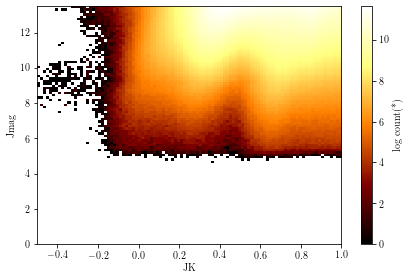

In [8]:
tmass.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

filter out only for A quality

## Check at each color range

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


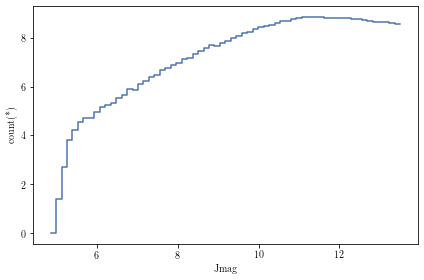

In [9]:
tmass_filt = tmass.filter("JK <0.1").filter("JK > 0")
tmass_filt = tmass_filt.extract()
tmass_filt.viz.histogram("Jmag", shape=100, show=True, limits=[0, 13.5], f='log')

looks nice to me!

# gaia

In [10]:
gaia_files = glob(join(gaia_dir, "gaia-*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

load gaia

In [11]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.012599945068359375,0.012599945068359375,0.0,nan,--,nan,nan,nan,-0.36550000309944153,gspphot,0.005600005388259888,0.00560000538

let's see the sky distribution using healpix.

Gaia data have special column called `source_id` which can be transformed into healpix index. Let's see the distribution of the data.

In [12]:
import healpy as hp

level = 6
factor = 34359738368 * (4**(12-level))
nmax = hp.nside2npix(2**level)
epsilon = 1e-16
counts = gaia.count(binby=gaia.source_id/factor, limits=[-epsilon, nmax-epsilon], shape=nmax)
counts

array([129, 152, 150, ..., 388, 393, 387])

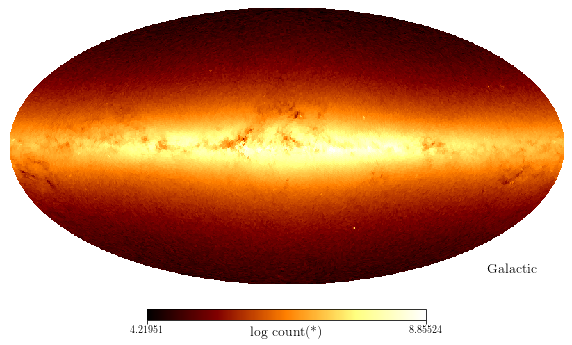

In [13]:
gaia.viz.healpix_heatmap(
    f="log",
    healpix_level=6,
    figsize=(10,8),
    healpix_output="galactic"
)

add color JK

In [14]:
gaia['JK'] = gaia['Jmag'] - gaia['Kmag']
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.444000244140625
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.939000129699707
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.43900012969970703
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.012599945068359375,0.012599945068359375,0.0,nan,--,nan,nan,nan,-0.3

and the heatmap

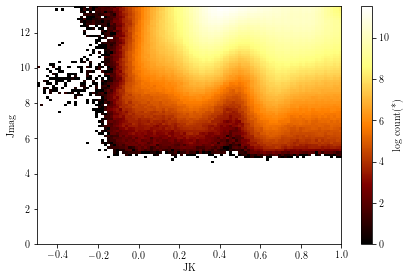

In [15]:
gaia.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

looks similar to 2MASS.

Let's compare them!

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


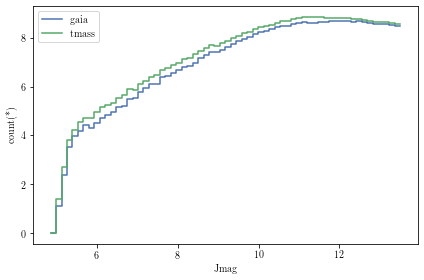

In [16]:
gaia_filt = gaia.filter("JK <0.1").filter("JK > 0")
gaia_filt = gaia_filt.extract()
gaia_filt.viz.histogram("Jmag", shape=100, label="gaia", limits=[0, 13.5], f='log')
tmass_filt.viz.histogram("Jmag", shape=100, label="tmass", limits=[0, 13.5], f='log')
plt.legend()

# Let's do some math

We are going to fit them for each color range.

In [20]:
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK
0,0.083926,-39.398678,10.694000244140625,10.805999755859375,AAA,2306324354788491392,16.902462005615234,16.70142208907451,0.04487789422273636,2.599182764300726,0.04380851238965988,1.1551553856622627,0.05527156591415405,10.266007423400879,10.167257308959961,10.445054054260254,907.5718383789062,2303.904541015625,1.2383010387420654,1.151212215423584,340.61218028882803,-73.7664122914903,nan,nan,nan,nan,nan,nan,nan,nan,nan,B,--,-17.58099937438965,rave,14.46500015258789,14.46500015258789,1.0,16899.0,rave,nan,nan,-1.0,3.5,rave,nan,nan,-1.0,nan,--,nan,nan,nan,-0.12999999523162842,rave,nan,nan,-1.0,0.0,rave,nan,nan,-1.0,nan,--,nan,nan,nan,-0.11199951171875
1,0.703555,-23.875792,9.720000267028809,9.786999702453613,AAA,2339762397470743040,24.379138946533203,21.42026140758288,0.039431773126125336,-11.641082494201054,0.03821288421750069,1.6860203257167647,0.04729332774877548,9.620647430419922,9.585709571838379,9.667413711547852,1725.8192138671875,3017.943359375,1.2859443426132202,1.1521222591400146,46.75736983527793,-78.56264939578271,788.13818359375,775.2838745117188,799.7817993164062,0.027000000700354576,0.024000000208616257,0.030300000682473183,nan,nan,nan,B,--,-23.98074722290039,gaia,3.1079769134521484,3.1079769134521484,1.0,10822.7470703125,gspphot,32.521484375,32.2744140625,0.0,4.005199909210205,gspphot,0.0076999664306640625,0.010300159454345703,0.0,nan,--,nan,nan,nan,0.35530000925064087,gspphot,0.0731000006198883,0.07670000195503235,0.0,1.190000057220459,gspspec,0.5900000333786011,0.2099999189376831,0.0,nan,--,nan,nan,nan,-0.06699943542480469
2,0.29125,33.673668,12.251999855041504,12.32699966430664,AAA,2875052211750644736,8.659928321838379,-5.138247036294932,0.024111898615956306,-6.970851655933436,0.015382086858153343,0.4293602899829419,0.02464147098362446,12.229713439941406,12.216815948486328,12.253593444824219,1756.832275390625,1971.3267822265625,0.9395914673805237,1.145661473274231,111.09224086471328,-28.039692516648742,2667.426025390625,2403.133056640625,2759.72021484375,0.12890000641345978,0.12700000405311584,0.1306000053882599,nan,nan,nan,B,--,nan,--,nan,nan,nan,11392.5908203125,gspphot,32.451171875,41.203125,0.0,3.9061999320983887,gspphot,0.019700050354003906,0.06410002708435059,0.0,nan,--,nan,nan,nan,-0.6504999995231628,gspphot,0.10920000076293945,0.12159997224807739,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.07499980926513672
3,0.432675,42.36718,6.189000129699707,6.2779998779296875,AAA,384429951297794944,5.049293041229248,4.653617074237628,0.03626277297735214,-1.9593897705497456,0.03272278979420662,2.9771524084160514,0.04811790958046913,6.226424217224121,6.2039875984191895,6.219211101531982,1379.0947265625,1138.3897705078125,1.0530807971954346,1.1641004085540771,113.21765499533439,-19.565086278188392,nan,nan,nan,nan,nan,nan,nan,nan,nan,B,--,-0.9469400644302368,gaia,0.30964574217796326,0.30964574217796326,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.08899974822998047
4,0.181814,45.253334,6.4070000648498535,6.511000156402588,AAA,386569051169184384,17.755308151245117,17.744922631040318,0.03278348594903946,0.6071854832831287,0.027441972866654396,5.578363384779314,0.04050687327980995,6.332676410675049,6.2956743240356445,6.359922885894775,376.37939453125,201.00392150878906,0.965363621711731,1.1608622074127197,113.64943240189234,-16.70246918932

In [19]:
gaia_J = gaia_filt.Jmag.to_numpy()
tmass_J = tmass_filt.Jmag.to_numpy()

np.histogram(gaia_J, bins=100, range=(0, 13.5))

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK
0,0.083926,-39.398678,10.694000244140625,10.805999755859375,AAA,2306324354788491392,16.902462005615234,16.70142208907451,0.04487789422273636,2.599182764300726,0.04380851238965988,1.1551553856622627,0.05527156591415405,10.266007423400879,10.167257308959961,10.445054054260254,907.5718383789062,2303.904541015625,1.2383010387420654,1.151212215423584,340.61218028882803,-73.7664122914903,nan,nan,nan,nan,nan,nan,nan,nan,nan,B,--,-17.58099937438965,rave,14.46500015258789,14.46500015258789,1.0,16899.0,rave,nan,nan,-1.0,3.5,rave,nan,nan,-1.0,nan,--,nan,nan,nan,-0.12999999523162842,rave,nan,nan,-1.0,0.0,rave,nan,nan,-1.0,nan,--,nan,nan,nan,-0.11199951171875
1,0.703555,-23.875792,9.720000267028809,9.786999702453613,AAA,2339762397470743040,24.379138946533203,21.42026140758288,0.039431773126125336,-11.641082494201054,0.03821288421750069,1.6860203257167647,0.04729332774877548,9.620647430419922,9.585709571838379,9.667413711547852,1725.8192138671875,3017.943359375,1.2859443426132202,1.1521222591400146,46.75736983527793,-78.56264939578271,788.13818359375,775.2838745117188,799.7817993164062,0.027000000700354576,0.024000000208616257,0.030300000682473183,nan,nan,nan,B,--,-23.98074722290039,gaia,3.1079769134521484,3.1079769134521484,1.0,10822.7470703125,gspphot,32.521484375,32.2744140625,0.0,4.005199909210205,gspphot,0.0076999664306640625,0.010300159454345703,0.0,nan,--,nan,nan,nan,0.35530000925064087,gspphot,0.0731000006198883,0.07670000195503235,0.0,1.190000057220459,gspspec,0.5900000333786011,0.2099999189376831,0.0,nan,--,nan,nan,nan,-0.06699943542480469
2,0.29125,33.673668,12.251999855041504,12.32699966430664,AAA,2875052211750644736,8.659928321838379,-5.138247036294932,0.024111898615956306,-6.970851655933436,0.015382086858153343,0.4293602899829419,0.02464147098362446,12.229713439941406,12.216815948486328,12.253593444824219,1756.832275390625,1971.3267822265625,0.9395914673805237,1.145661473274231,111.09224086471328,-28.039692516648742,2667.426025390625,2403.133056640625,2759.72021484375,0.12890000641345978,0.12700000405311584,0.1306000053882599,nan,nan,nan,B,--,nan,--,nan,nan,nan,11392.5908203125,gspphot,32.451171875,41.203125,0.0,3.9061999320983887,gspphot,0.019700050354003906,0.06410002708435059,0.0,nan,--,nan,nan,nan,-0.6504999995231628,gspphot,0.10920000076293945,0.12159997224807739,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.07499980926513672
3,0.432675,42.36718,6.189000129699707,6.2779998779296875,AAA,384429951297794944,5.049293041229248,4.653617074237628,0.03626277297735214,-1.9593897705497456,0.03272278979420662,2.9771524084160514,0.04811790958046913,6.226424217224121,6.2039875984191895,6.219211101531982,1379.0947265625,1138.3897705078125,1.0530807971954346,1.1641004085540771,113.21765499533439,-19.565086278188392,nan,nan,nan,nan,nan,nan,nan,nan,nan,B,--,-0.9469400644302368,gaia,0.30964574217796326,0.30964574217796326,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.08899974822998047
4,0.181814,45.253334,6.4070000648498535,6.511000156402588,AAA,386569051169184384,17.755308151245117,17.744922631040318,0.03278348594903946,0.6071854832831287,0.027441972866654396,5.578363384779314,0.04050687327980995,6.332676410675049,6.2956743240356445,6.359922885894775,376.37939453125,201.00392150878906,0.965363621711731,1.1608622074127197,113.64943240189234,-16.70246918932

-0.2 -0.06666666666666668


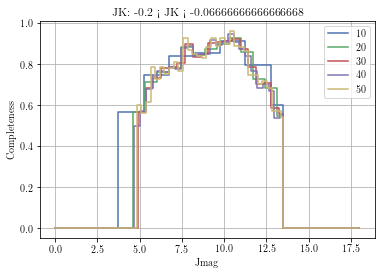

-0.06666666666666668 0.06666666666666665


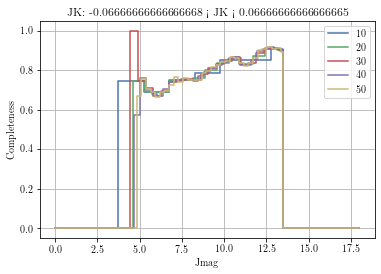

0.06666666666666665 0.2


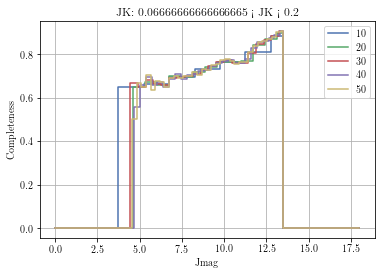

0.2 0.3333333333333333


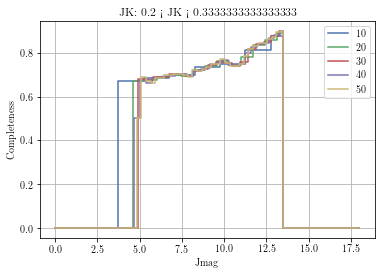

0.3333333333333333 0.4666666666666666


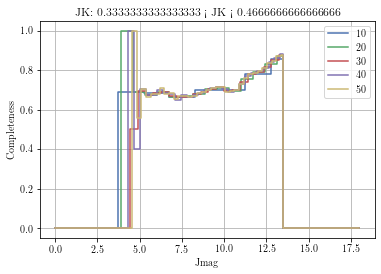

0.4666666666666666 0.6000000000000001


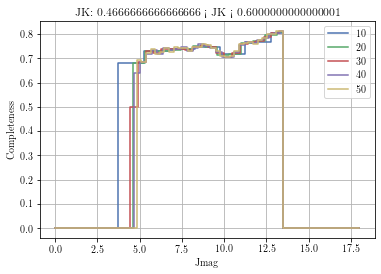

0.6000000000000001 0.7333333333333334


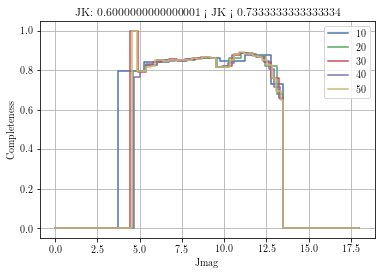

0.7333333333333334 0.8666666666666667


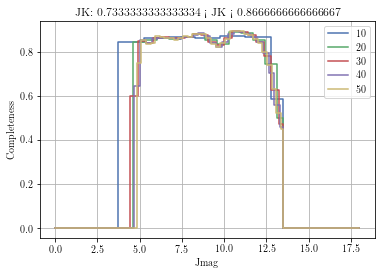

0.8666666666666667 1.0


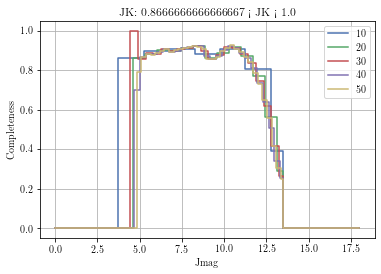

In [22]:
from tqdm import tqdm

jks = np.linspace(-0.2, 1, 10)
for jk_low, jk_high in zip(jks[:-1], jks[1:]):
    print(jk_low, jk_high)
    tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    tmass_filt = tmass_filt.extract()
    tmass_J = tmass_filt.Jmag.to_numpy()
    gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    gaia_filt = gaia_filt.extract()
    gaia_J = gaia_filt.Jmag.to_numpy()
    plt.figure(figsize=(6,4))
    for N in range(10, 51, 10):
        # gaia_H = gaia_filt.count(binby=gaia_filt.Jmag, limits=[0, 13.5], shape=N)
        # tmass_H = tmass_filt.count(binby=tmass_filt.Jmag, limits=[0, 13.5], shape=N)
        gaia_H = np.histogram(gaia_J, bins=N, range=(0, 13.5))[0]
        tmass_H = np.histogram(tmass_J, bins=N, range=(0, 13.5))[0]
        Js = np.linspace(0, 13.5, N)
        extend = np.linspace(13.5, 18, 20)
        Js = np.append(Js, extend)
        mask = tmass_H==0
        tmass_H[mask] = 1
        gaia_H[mask] = 0
        frac = gaia_H/tmass_H
        frac = np.append(frac, np.zeros_like(extend))
        plt.plot(Js, frac, drawstyle="steps-mid", label=N)
    plt.legend()
    plt.title(f"JK: {jk_low} < JK < {jk_high}")
    plt.xlabel("Jmag")
    plt.ylabel("Completeness")
    plt.grid()
    plt.show()

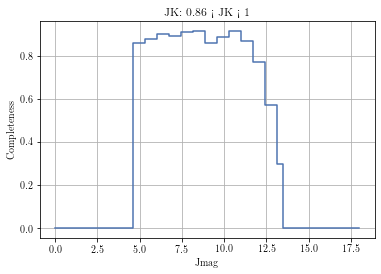

In [24]:
jk_high, jk_low = 1, 0.86
tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
tmass_filt = tmass_filt.extract()
tmass_J = tmass_filt.Jmag.to_numpy()
gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
gaia_filt = gaia_filt.extract()
gaia_J = gaia_filt.Jmag.to_numpy()

gaia_H = np.histogram(gaia_J, bins=20, range=(0, 13.5))[0]
tmass_H = np.histogram(tmass_J, bins=20, range=(0, 13.5))[0]
Js = np.linspace(0, 13.5, 20)
extend = np.linspace(13.5, 18, 20)
Js = np.append(Js, extend)
tmass_H[tmass_H==0] = 1
gaia_H[tmass_H==0] = 0
frac = gaia_H/tmass_H
ydata = np.append(frac, np.zeros_like(extend))
xdata = Js

plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()

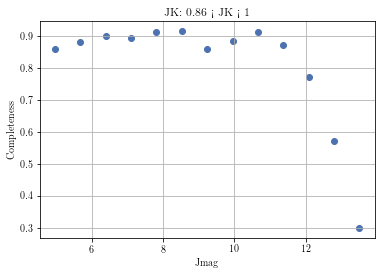

In [25]:
mask = (ydata != 0)
xd = xdata[mask]
yd = ydata[mask]

# plot
plt.scatter(xd, yd)
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()

<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


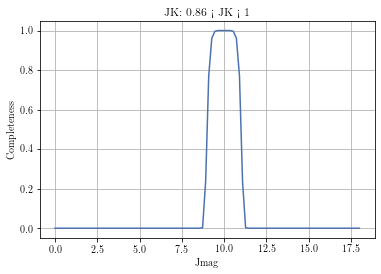

In [26]:
def window(x, x0, w, n):
    return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2

# plot
x = np.linspace(0, 18, 100)
plt.plot(x, window(x, 10, 1, 4))
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()


[-3.53160128e-05  6.57491455e-04  2.50395537e-03 -1.27889855e-01
  9.40551399e-01 -1.26192858e+00]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


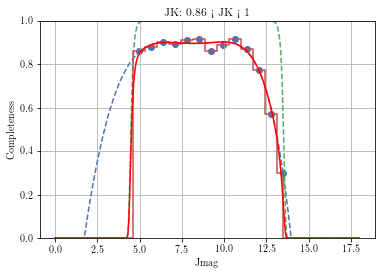

In [27]:
# polyfit
p = np.polyfit(xd, yd, 5)
print(p)
# evaluate
x = np.linspace(0, 18, 500)
y = np.polyval(p, x)
yw = window(x, 9, 4.5, 18)
# plot
plt.scatter(xd, yd)
plt.plot(x, y, ls="--")
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.plot(x, yw, ls="--")
plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.plot(x, yw*y, c="r")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()

<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


[8.99246526 4.50011753]


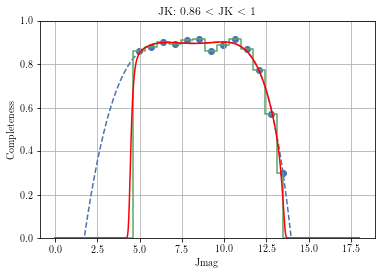

In [30]:
from scipy.optimize import curve_fit

x = np.linspace(0, 18, 500)
y = np.polyval(p, x)

p = np.polyfit(xd, yd, 5)
def comp_func(x, x0, w):
    return window(x, x0, w, 18)*np.polyval(p, x)

popt, pcov = curve_fit(comp_func, xdata, ydata, p0=[9, 4.5])
print(popt)
plt.scatter(xd, yd)
plt.plot(x, y, ls="--")
plt.title(f"JK: {jk_low} $<$ JK $<$ {jk_high}")
plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.plot(x, comp_func(x, *popt), c="r")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()

In [31]:
p = 2.8
jk_s_stretch = np.linspace(0, 0.5**p, 13)
jks = np.power(jk_s_stretch, 1/p)-0.1
jk_bound = [np.round(jk,2) for jk in zip(jks[:-1], jks[1:])]
jk_bound

[array([-0.1 ,  0.11]),
 array([0.11, 0.16]),
 array([0.16, 0.2 ]),
 array([0.2 , 0.24]),
 array([0.24, 0.27]),
 array([0.27, 0.29]),
 array([0.29, 0.31]),
 array([0.31, 0.33]),
 array([0.33, 0.35]),
 array([0.35, 0.37]),
 array([0.37, 0.38]),
 array([0.38, 0.4 ])]

-0.1 0.11
filter 2mass: 0.44 s
filter gaia: 0.37 s
count gaia: 0.00 s
count 2mass: 0.00 s
[8.99056114 4.49617099]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


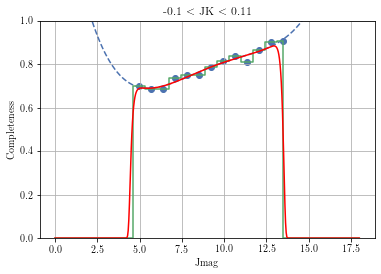

0.11 0.16
filter 2mass: 0.38 s
filter gaia: 0.35 s
count gaia: 0.00 s
count 2mass: 0.00 s
[9.06539232 4.4232286 ]


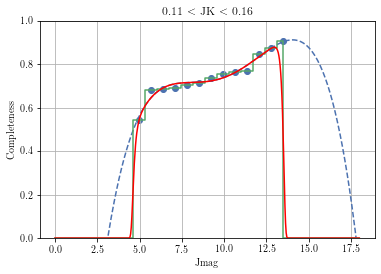

0.16 0.2
filter 2mass: 0.41 s
filter gaia: 0.36 s
count gaia: 0.00 s
count 2mass: 0.00 s
[8.98780994 4.49836128]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


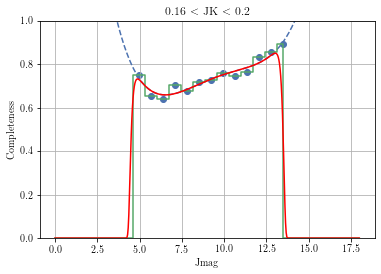

0.2 0.24
filter 2mass: 0.44 s
filter gaia: 0.39 s
count gaia: 0.01 s
count 2mass: 0.01 s
[8.98875387 4.49790837]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


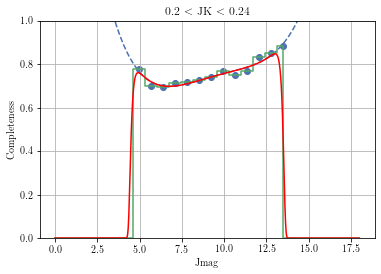

0.24 0.27
filter 2mass: 0.47 s
filter gaia: 0.38 s
count gaia: 0.01 s
count 2mass: 0.01 s
[8.99231387 4.49520142]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


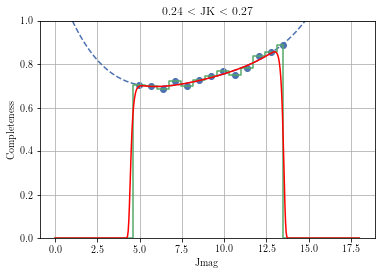

0.27 0.29
filter 2mass: 0.49 s
filter gaia: 0.39 s
count gaia: 0.01 s
count 2mass: 0.01 s
[8.99622554 4.49188001]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


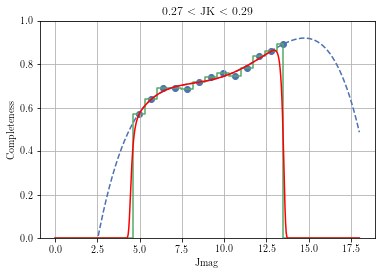

0.29 0.31
filter 2mass: 0.46 s
filter gaia: 0.38 s
count gaia: 0.01 s
count 2mass: 0.01 s
[8.98587494 4.50047449]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


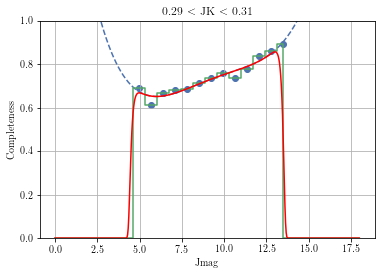

0.31 0.33
filter 2mass: 0.47 s
filter gaia: 0.39 s
count gaia: 0.01 s
count 2mass: 0.01 s
[9.10640794 4.38356343]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


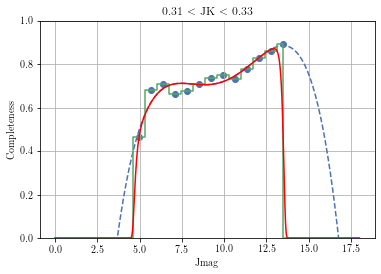

0.33 0.35
filter 2mass: 0.48 s
filter gaia: 0.39 s
count gaia: 0.01 s
count 2mass: 0.01 s
[8.99361119 4.49326572]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


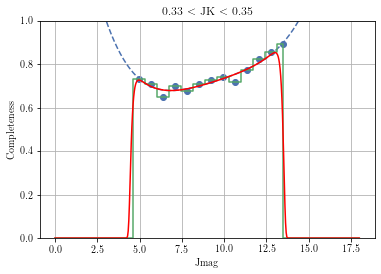

0.35 0.37
filter 2mass: 0.48 s
filter gaia: 0.39 s
count gaia: 0.01 s
count 2mass: 0.01 s
[8.63243811 4.8496021 ]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


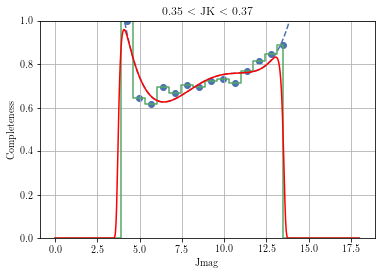

0.37 0.38
filter 2mass: 0.48 s
filter gaia: 0.40 s
count gaia: 0.01 s
count 2mass: 0.01 s
[8.98760956 4.49865802]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


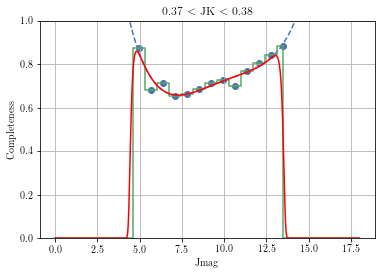

0.38 0.4
filter 2mass: 0.50 s
filter gaia: 0.45 s
count gaia: 0.02 s
count 2mass: 0.02 s
[8.98514879 4.50071795]


<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


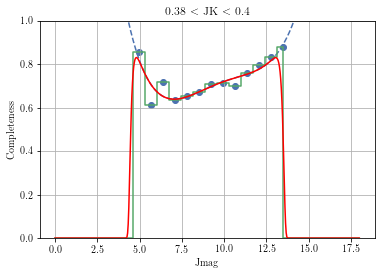

In [33]:
from time import time

p = 2.8
jk_s_stretch = np.linspace(0, 0.5**p, 13)
jk_s = np.power(jk_s_stretch, 1/p)-0.1
jk_bound = [np.round(jk,2) for jk in zip(jk_s[:-1], jk_s[1:])]

pol = []
popts = []

N= 20

for jk_low, jk_high in jk_bound:
    t0 = time()
    print(jk_low, jk_high)
    tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    tmass_filt = tmass_filt.extract()
    tmass_J = tmass_filt.Jmag.to_numpy()
    t1 = time()
    print(f"filter 2mass: {t1-t0:.2f} s")
    gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    gaia_filt = gaia_filt.extract()
    gaia_J = gaia_filt.Jmag.to_numpy()
    t2 = time()
    print(f"filter gaia: {t2-t1:.2f} s")
    # gaia_H = gaia_filt.count(binby=gaia_filt.Jmag, limits=[0, 13.5], shape=N)
    gaia_H = np.histogram(gaia_J, bins=N, range=[0, 13.5])[0]
    t3 = time()
    print(f"count gaia: {t3-t2:.2f} s")
    # tmass_H = tmass_filt.count(binby=tmass_filt.Jmag, limits=[0, 13.5], shape=N)
    tmass_H = np.histogram(tmass_J, bins=N, range=[0, 13.5])[0]
    t4 = time()
    print(f"count 2mass: {t4-t3:.2f} s")
    Js = np.linspace(0, 13.5, N)
    extend = np.linspace(13.5, 18, 20)
    Js = np.append(Js, extend)
    tmass_H[tmass_H==0] = 1
    gaia_H[tmass_H==0] = 0
    frac = gaia_H/tmass_H
    ydata = np.append(frac, np.zeros_like(extend))
    xdata = Js

    mask = (ydata != 0)
    xd = xdata[mask]
    yd = ydata[mask]

    p = np.polyfit(xd, yd, 4)
    pol.append(p)

    x = np.linspace(0, 18, 500)
    y = np.polyval(p, x)

    def comp_func(x, x0, w):
        return window(x, x0, w, 18)*np.polyval(p, x)

    popt, pcov = curve_fit(comp_func, xdata, ydata, p0=[9, 4.5])
    popts.append(popt)
    print(popt)
    plt.scatter(xd, yd)
    plt.plot(x, y, ls="--")
    plt.title(f"{jk_low} $<$ JK $<$ {jk_high}")
    plt.plot(xdata, ydata, drawstyle="steps-mid")
    plt.plot(x, comp_func(x, *popt), c="r")
    plt.xlabel("Jmag")
    plt.ylabel("Completeness")
    plt.grid()
    plt.ylim(0,1)
    plt.show()

In [34]:
def comf(x, x0, w, p):
    return window(x, x0, w, 18)*np.polyval(p, x)

df_args = []

for jk_low, jk_high, p, popt in zip(jks[:-1], jks[1:], pol, popts):
    args_dict = {"x0": [popt[0]], "w": [popt[1]], 
    "p1": [p[0]], "p2": [p[1]], "p3": [p[2]], "p4": [p[3]], "p5": [p[4]], "jk_low": [jk_low], "jk_high": [jk_high]}
    if len(df_args) == 0:
        df_args = vaex.from_dict(args_dict)
    else:
        df_args = df_args.concat(vaex.from_dict(args_dict))
df_args

#,x0,w,p1,p2,p3,p4,p5,jk_low,jk_high
0,8.990561140517576,4.496170988105943,0.00019029429000113124,-0.0072541871171356445,0.10108071908222793,-0.5805173536450419,1.8570263774078304,-0.1,0.105848701001611
1,9.065392323319239,4.423228596883783,-0.00044342529968700205,0.017857189501348847,-0.25931198120700993,1.6310510426114018,-3.063509691302195,0.105848701001611,0.16366886121822902
2,8.98780994118714,4.498361279727464,0.00046301762669995173,-0.0177167534013384,0.25032430717885074,-1.5183817388767205,3.990781299904034,0.16366886121822902,0.20475341355111884
3,8.988753872291198,4.497908369141799,0.00033134639535535126,-0.012624921587133738,0.1791190260031462,-1.1000223061548882,3.1568620285045017,0.20475341355111884,0.23772993483973273
4,8.992313869339458,4.4952014176398825,7.506812537606539e-05,-0.002699367429457825,0.03833368665047507,-0.23303563355633156,1.2011691752361262,0.23772993483973273,0.26574658110353233
...,...,...,...,...,...,...,...,...,...
7,9.106407940725562,4.383563428357552,-0.0007266379988467506,0.028879822738818357,-0.41596523885540476,2.591681487425466,-5.2123754612071185,0.3124476745531459,0.33259377827116876
8,8.993611193809983,4.4932657237194285,0.0002021458010305363,-0.007725404299818127,0.11246173877256588,-0.713262041657561,2.325498061149088,0.33259377827116876,0.3511791554629845
9,8.632438114216738,4.849602097051763,0.0009538316814791642,-0.03584264100032253,0.492844078724397,-2.906115616425369,6.834012830991765,0.3511791554629845,0.36847992756230363
10,8.987609561679648,4.498658022695529,0.0005384432544580958,-0.021348189739621645,0.31566074137023786,-2.0331218288738815,5.4534117702703355,0.36847992756230363,0.3847011941999271


In [35]:
df_args.export(join(data_dir, "coefficients.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.07s =  0.0m =  0.0h
 

# LOAD COEFFs

In [36]:
df_args = vaex.open(join(data_dir, "coefficients.hdf5"))
df_args = df_args.to_pandas_df()
df_args

,x0,w,p1,p2,p3,p4,p5,jk_low,jk_high
0,8.990561,4.496171,0.000190,-0.007254,0.101081,-0.580517,1.857026,-0.100000,0.105849
1,9.065392,4.423229,-0.000443,0.017857,-0.259312,1.631051,-3.063510,0.105849,0.163669
2,8.987810,4.498361,0.000463,-0.017717,0.250324,-1.518382,3.990781,0.163669,0.204753
3,8.988754,4.497908,0.000331,-0.012625,0.179119,-1.100022,3.156862,0.204753,0.237730
4,8.992314,4.495201,0.000075,-0.002699,0.038334,-0.233036,1.201169,0.237730,0.265747
5,8.996226,4.491880,-0.000252,0.010350,-0.153137,0.990869,-1.684850,0.265747,0.290355
6,8.985875,4.500474,0.000276,-0.010343,0.143215,-0.840562,2.414612,0.290355,0.312448
7,9.106408,4.383563,-0.000727,0.028880,-0.415965,2.591681,-5.212375,0.312448,0.332594
8,8.993611,4.493266,0.000202,-0.007725,0.112462,-0.713262,2.325498,0.332594,0.351179
9,8.632438,4.849602,0.000954,-0.035843,0.492844,-2.906116,6.834013,0.351179,0.368480


reconstruct

<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


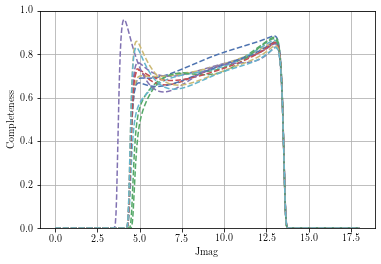

In [38]:
x = np.linspace(0, 18, 500)

# iterate over rows with iterrows
for index, row in df_args.iterrows():
    x0 = row.x0
    w = row.w
    p = [row.p1, row.p2, row.p3, row.p4, row.p5]
    y = comf(x, x0, w, p)
    plt.plot(x, y, ls="--", )
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()


create a function that take `j` mag and color `jk`, return it's completeness.

<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


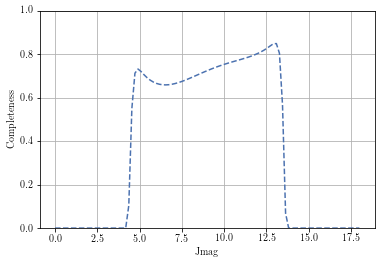

In [39]:
jk_lows = df_args.jk_low.values
jk_highs = df_args.jk_high.values
x0s = df_args.x0.values
x0s = np.append(x0s, 0)
ws = df_args.w.values
ws = np.append(ws, 1)
ps = df_args[["p1", "p2", "p3", "p4", "p5"]].values
ps = np.append(ps, np.zeros((len(ps), 5)), axis=0)

def polyv(p, j):
    print(p.shape)
    print(j.shape)
    return np.polyval(p, j)

def compjk(j, jk):
    index = np.searchsorted(jk_highs, jk)
    x0 = x0s[index]
    w = ws[index]
    p = ps[index]
    polifit_v = np.array([np.polyval(pi, ji) for pi, ji in zip(p, j)])
    return np.select([jk > 0.4, jk < -0.1], [0, 0], default=window(j, x0, w, 18)*polifit_v)

js = np.linspace(0, 18, 100)
jks = np.ones_like(js)*0.2

plt.plot(js, compjk(js, jks), ls="--")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()
